In [2]:
'''
EXERCISES 2.1 AND 2.2
'''

import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import os

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


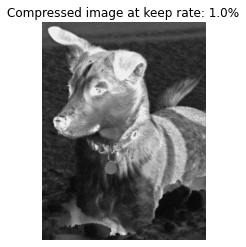

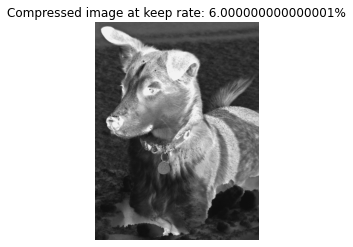

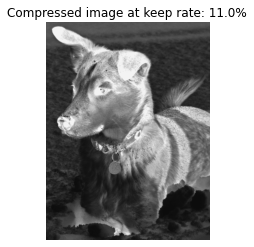

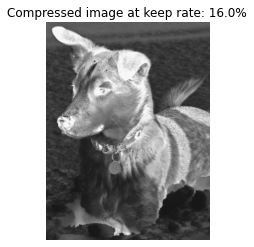

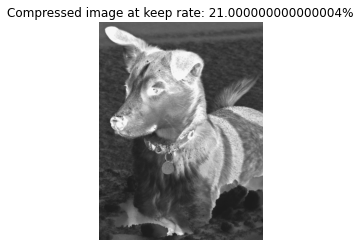

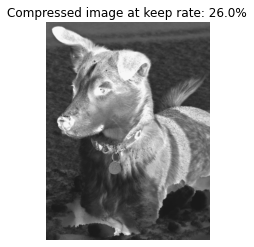

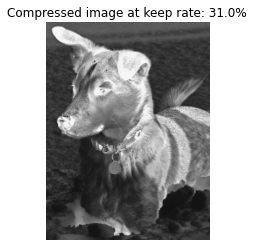

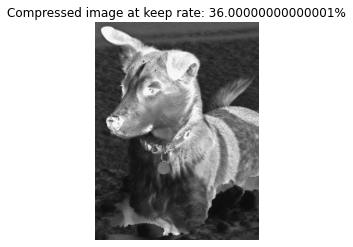

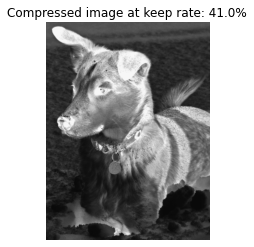

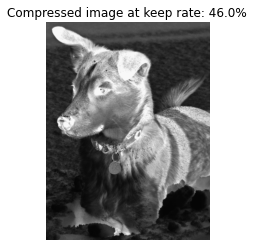

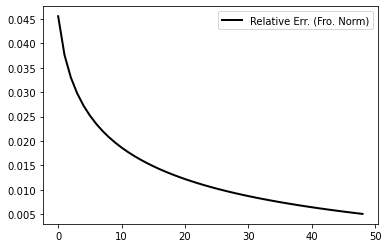

In [21]:
'''
Chapter 2 exercise 1
- Load the image dog.jpg and convert to grayscale
- Use the FFT to compress the image at different compression ratios
- plot the error between the compressed and actual image as
a function of the compression ratio
'''


fname = '../math6397_villalobos/homework1/dog.jpg'
img_data = imread(fname)
X = np.mean(img_data, -1); # Convert RGB to grayscale
denom = np.linalg.norm(X, 'fro')

#take fft of matrix
X_fft = np.fft.fft2(X)
#print(X_fft.shape)

#sorting by magnitude and reshaping into vector
X_fft_sort = np.sort(np.abs(X_fft.reshape(-1)))
#print(X_fft_sort.shape)

keeps = np.array([0.5,0.1, 0.05, 0.01, 0.002])
keeps = np.arange(0.01, 0.5, .01)
errors = np.zeros_like(keeps)

##############################################
k=0
for r in keeps:
    thresh = X_fft_sort[int( np.floor((1-r)*len(X_fft_sort)) )]
    #print(r, '\t', thresh)

    #Find all indices below threshold
    indx = np.abs(X_fft) > thresh

    #compress holding only largest r percent of coefficients
    X_fft_r = X_fft * indx

    #reconstructed compressed image i.e. take inverse fft
    X_recon = np.fft.ifft2(X_fft_r).real

    diff = np.copy(X - X_recon)
    abs_err = np.linalg.norm(diff, 'fro')

    errors[k] = abs_err / denom

    if k%5==0:
        plt.figure()
        plt.imshow(256-X_recon,cmap='gray')
        plt.axis('off')
        plt.title('Compressed image at keep rate: '+str(r*100)+'%')
    k+=1
        
print(keeps*100)
#plt.show()
plt.figure()
plt.plot( errors, color='k',linewidth=2, label='Relative Err. (Fro. Norm)')
plt.legend()

In [22]:
'''
Consider the given triangular wave
        {0,         x<-1
f(x) =  {1 - |x|,   |x| <= 1
        {0,         x<-1
- Compute the Fourier series by hand for the domain -2 <= x < 2
- Plot the mode coefficients a_n and b_n for the first 100 cosine and sine modes
(i.e., for the first n=1 to n=100).
- Also,  plot the the approximation using n=10 modes on top of the true tirangle wave
'''

def piecewise_f(x):
    fvals = np.zeros_like(x)
    indx = np.abs(x) <= 1.0
    fvals = 1.0 - np.abs(x)
    fvals = fvals * indx

    return fvals


'''
x = np.arange(-2,2.5, 0.5)
f = piecewise_f(x)
plt.figure()
plt.plot(x,f, color='k',linewidth=2, label='Fcn')
plt.show()
'''

"\nx = np.arange(-2,2.5, 0.5)\nf = piecewise_f(x)\nplt.figure()\nplt.plot(x,f, color='k',linewidth=2, label='Fcn')\nplt.show()\n"

Text(0.5, 1.0, 'Fourier Coefficients: B_k')

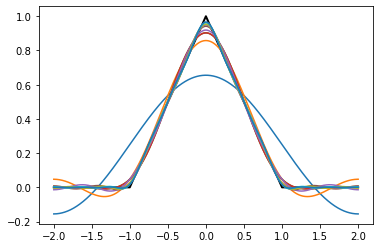

/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


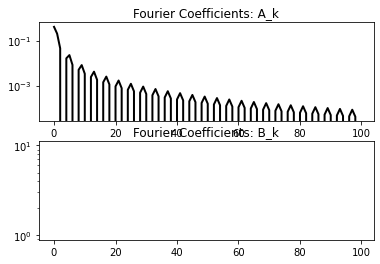

In [23]:
M = 100

#Define the domain
dx = 0.001
L = 2.0 
x = L*np.arange(-1+dx, 1+dx, dx)
n = len(x)
f = piecewise_f(x)

##############################################
A0 = 1.0/2.0#np.sum(f *np.ones_like(x))*dx
fFS = A0/2.0 #fourier series estimate

A = np.zeros(M)
B = np.zeros(M)

fig,ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

for k in range(M):
    #inner product with f
    #A[k] = np.sum(f * np.cos(np.pi * k+1* x/L))*dx
    #B[k] = np.sum(f * np.sin(np.pi * k+1* x/L))*dx

    A[k] = (4.0/(np.pi*(k+1))**2)*(1.0 - np.cos(np.pi*(k+1)/2.0))
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    if k <=10:
        ax.plot(x,fFS,'-')
#plt.show()

fix,axes = plt.subplots(2,1)
axes[0].semilogy(np.arange(M),A, color='k',linewidth=2)
plt.sca(axes[0])
plt.title('Fourier Coefficients: A_k')

axes[1].semilogy(np.arange(M),B, color='b',linewidth=2)
plt.sca(axes[1])
plt.title('Fourier Coefficients: B_k')